# Quick Overview
This notebook is aimed as my learning canvas of doing time series analysis with Python. After learn the theory about stationarity, forecasting concept and method (AR, MA, ARMA, ARIMA), I will apply to this notebook


Using plane arrival data set, I learn how to decompose the data, check stationarity, and forecast them using the best method.

# Quick Set Up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('aus_arrivals.csv')

In [ ]:
dataset

,Quarter,Origin,Arrivals
0,1981 Q1,Japan,14763
1,1981 Q2,Japan,9321
2,1981 Q3,Japan,10166
3,1981 Q4,Japan,19509
4,1982 Q1,Japan,17117
...,...,...,...
503,2011 Q3,US,101925
504,2011 Q4,US,127150
505,2012 Q1,US,129520
506,2012 Q2,US,105700


In [ ]:
# Practical of quarter:
# Pembabakan quarter bisa dilihat as bulan pertama dari setiap quarter OR tanggal pertama dari bulan pertama di setiap quarter
# For easier purpose, kita pakai month saja

# Function to map Q1/Q2/Q3/Q4 as their respective month
def map_quarter_to_month(quarter):
    quarter_to_month = {
        'Q1': '01',  # January
        'Q2': '04',  # April
        'Q3': '07',  # July
        'Q4': '10'   # October
    }
    return quarter_to_month[quarter]

In [ ]:
# To datetime tries to understand the date input
# First, we split the year and the Q
# Then apply mapping for the Q
# Join the year and month with '-' sign to make the machine easier to read
dataset['Quarter'] = dataset['Quarter'].apply(lambda x: pd.to_datetime(x.split()[0] + '-' + map_quarter_to_month(x.split()[1]) + '-01'))

In [ ]:
dataset

,Quarter,Origin,Arrivals
0,1981-01-01,Japan,14763
1,1981-04-01,Japan,9321
2,1981-07-01,Japan,10166
3,1981-10-01,Japan,19509
4,1982-01-01,Japan,17117
...,...,...,...
503,2011-07-01,US,101925
504,2011-10-01,US,127150
505,2012-01-01,US,129520
506,2012-04-01,US,105700


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Quarter   508 non-null    datetime64[ns]
 1   Origin    508 non-null    object        
 2   Arrivals  508 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
data_jpn = dataset.loc[dataset['Origin'] == 'Japan']
data_jpn

,Quarter,Origin,Arrivals
0,1981-01-01,Japan,14763
1,1981-04-01,Japan,9321
2,1981-07-01,Japan,10166
3,1981-10-01,Japan,19509
4,1982-01-01,Japan,17117
...,...,...,...
122,2011-07-01,Japan,96467
123,2011-10-01,Japan,89900
124,2012-01-01,Japan,98180
125,2012-04-01,Japan,59760


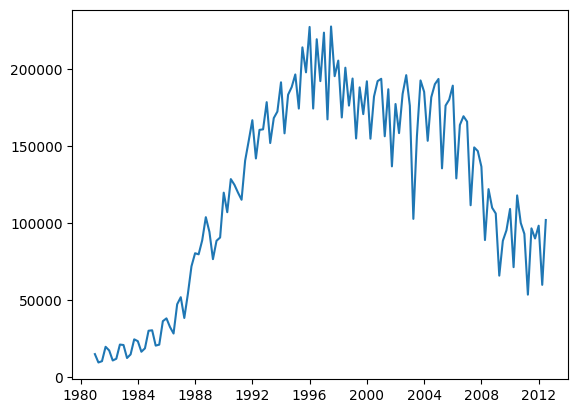

In [ ]:
plt.plot(data_jpn['Quarter'],
         data_jpn['Arrivals']);

# Autocorrelation Function

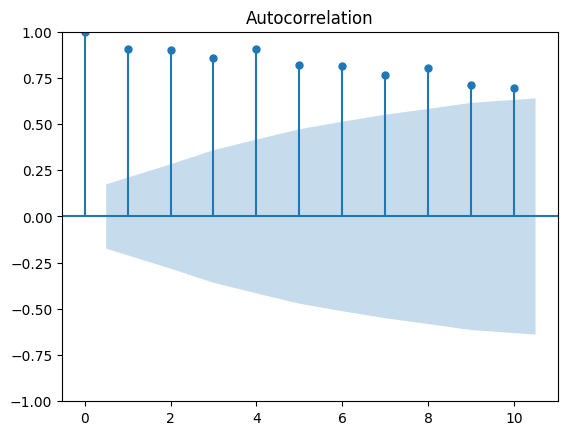

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_jpn['Arrivals'], lags=10)
plt.show()

From Autocorrelation function, we can confirm that:
1. There is a trend (exhibits lower and lower AC overtime). If there is a trend, current information does not fully "rely" to its previous info
2. There is a seasonal pattern: ACF decreases steadily and increases a bit on even lags.

For example, January's arrival information is more informative for March, rather than February (even leap). But, how is the mechanism? Let's see

In [ ]:
data_jpn['log_arrivals'] = np.log10(data_jpn['Arrivals'])

<ipython-input-19-c2a1b4c15473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jpn['log_arrivals'] = np.log10(data_jpn['Arrivals'])


# Decomposition


## STL Decomposition [Original Data]

In [ ]:
data_jpn

,Origin,Arrivals
Quarter,,
1981-01-01,Japan,14763
1981-04-01,Japan,9321
1981-07-01,Japan,10166
1981-10-01,Japan,19509
1982-01-01,Japan,17117
...,...,...
2011-07-01,Japan,96467
2011-10-01,Japan,89900
2012-01-01,Japan,98180


In [ ]:
# Set the 'Quarter' column as the index
# Apparently, STL needs a datetime as index
data_jpn.set_index('Quarter', inplace=True)

In [ ]:
from statsmodels.tsa.seasonal import STL

# Now apply STL decomposition
stl = STL(data_jpn['Arrivals'], period=4, seasonal=5)
result = stl.fit()

In [ ]:
# Access the decomposed components
seasonal, trend, resid = result.seasonal, result.trend, result.resid

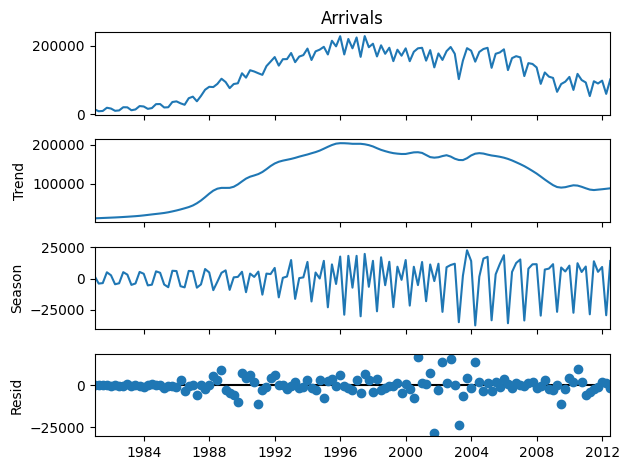

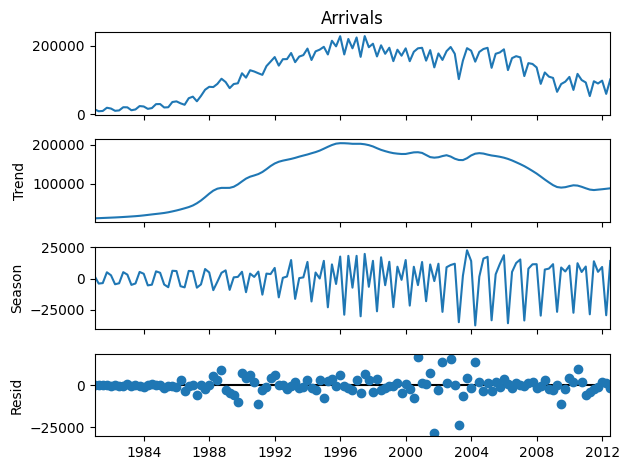

In [ ]:
result.plot()

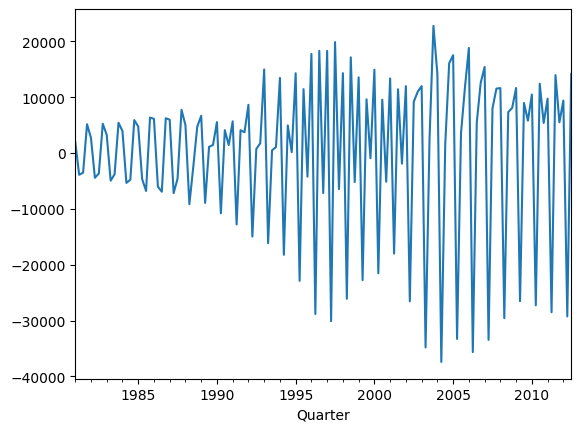

In [ ]:
seasonal.plot();

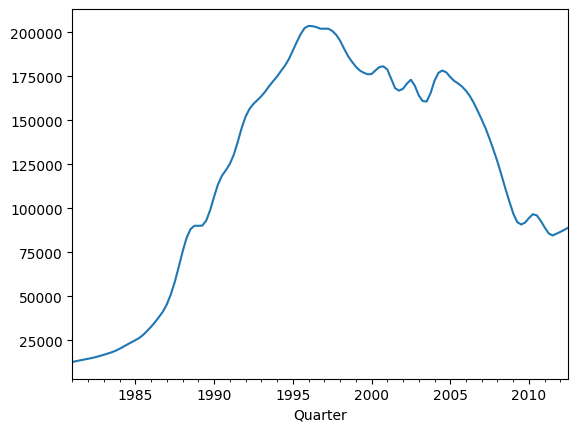

In [ ]:
trend.plot();

In [ ]:
# Deseasonal the data
data_jpn['Arrivals_nosea'] = data_jpn['Arrivals'] - seasonal

<ipython-input-40-947692501af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jpn['Arrivals_nosea'] = data_jpn['Arrivals'] - seasonal


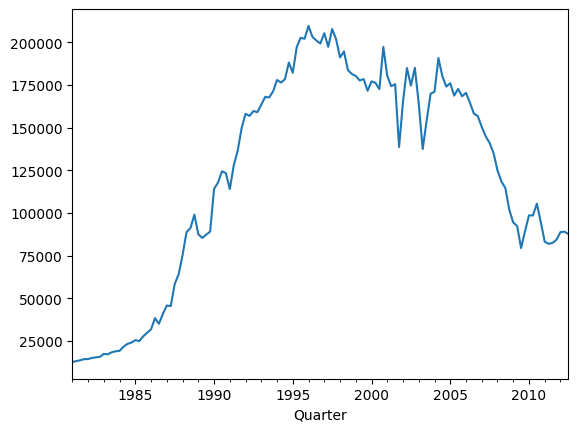

In [ ]:
data_jpn['Arrivals_nosea'].plot();

In [ ]:
# Detrend the deseason data
data_jpn['Arrivals_clean'] = data_jpn['Arrivals_nosea'] - trend

<ipython-input-41-8896bac7d4d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jpn['Arrivals_clean'] = data_jpn['Arrivals_nosea'] - trend


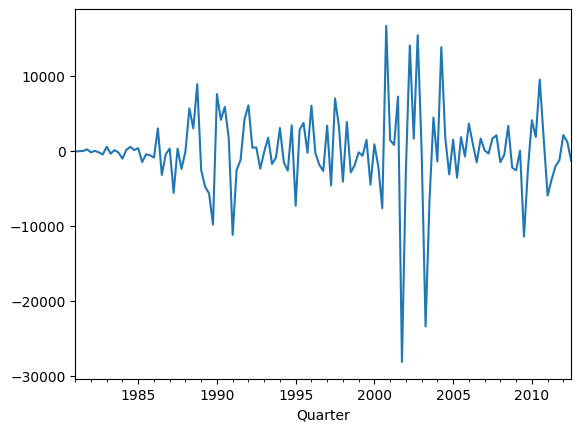

In [ ]:
data_jpn['Arrivals_clean'].plot();

## STL Decomposition [Log Data]

In [ ]:
stl_log = STL(data_jpn['log_arrivals'], period=4, seasonal=5)
result_log = stl_log.fit()

In [ ]:
# Access the decomposed components
seasonal_log, trend_log, resid_log = result_log.seasonal, result_log.trend, result_log.resid

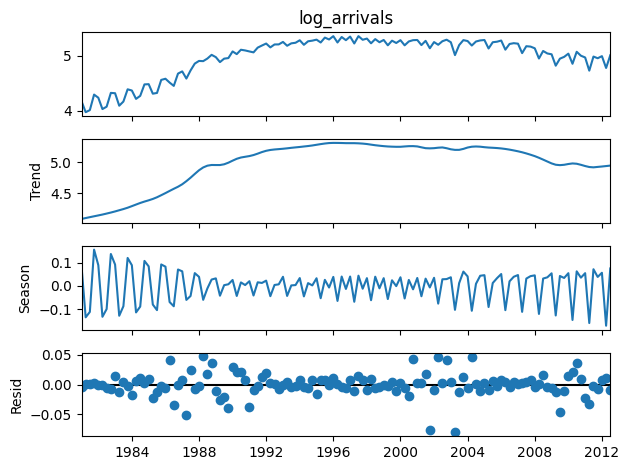

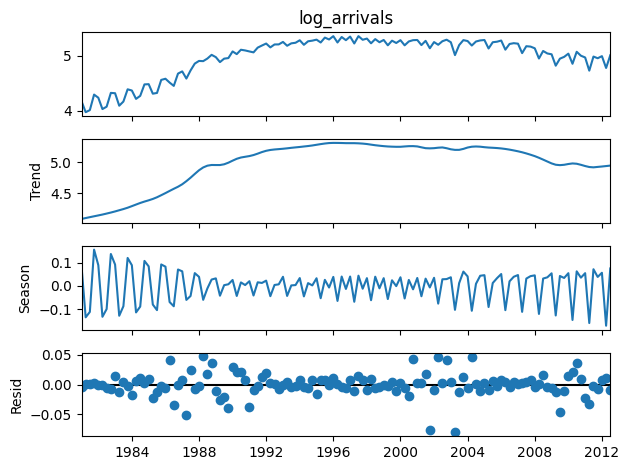

In [ ]:
result_log.plot()

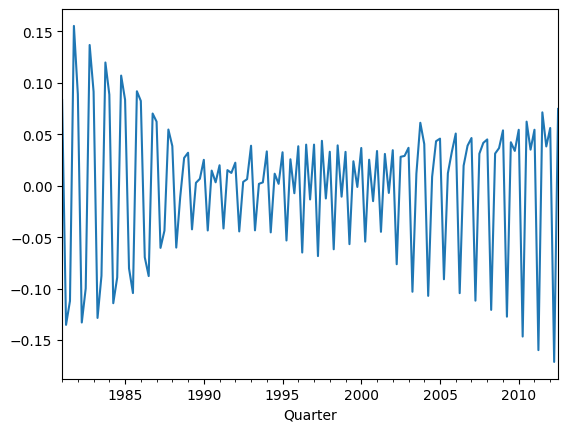

In [ ]:
seasonal_log.plot();

<Axes: xlabel='Quarter'>

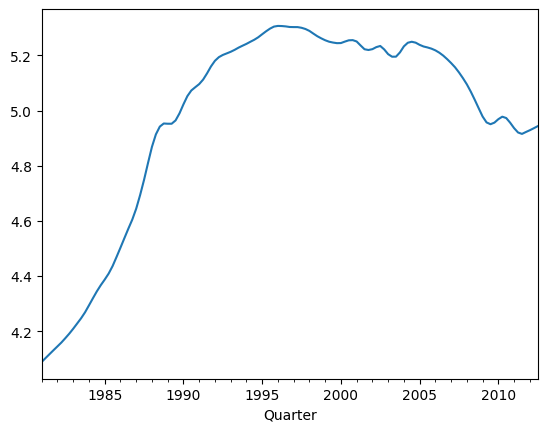

In [ ]:
trend_log.plot()

Since the STL models time series data as an additive component, doing log and then STL-ing them is not effective. Since we cant really see the growth pattern (shift from multiplicative to additive). This is can be seen that log-ed and non-log data share typical trend.

# Basic of Forecasting

## Stationarity Check

### Check Original Data Stationarity

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Apply Augmented Dickey-Fuller test
result = adfuller(data_jpn['Arrivals'])

# Extract and display the results
# Default: random walk with drift
# yt = c + yt-1 + et
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -2.2446525206741144
p-value: 0.19043995066528874
Critical Values: {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}


In [ ]:
# Apply Augmented Dickey-Fuller test: pure random walk
result = adfuller(data_jpn['Arrivals'], regression='n')

# Extract and display the results
# yt = yt-1 + et
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -0.6450541566988278
p-value: 0.43573528549065876
Critical Values: {'1%': -2.585114358974359, '5%': -1.9435220495837635, '10%': -1.6147323393728696}


In [ ]:
# Apply Augmented Dickey-Fuller test: random walk with drift and trend (linear trend)
result = adfuller(data_jpn['Arrivals'], regression='ct')

# Extract and display the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -1.2240778377082793
p-value: 0.9054517852775903
Critical Values: {'1%': -4.038307389431779, '5%': -3.448703208559121, '10%': -3.149449845280976}


In [ ]:
# Apply Augmented Dickey-Fuller test: random walk with drift and trend (not linear trend)
result = adfuller(data_jpn['Arrivals'], regression='ctt')

# Extract and display the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -3.4261733256456766
p-value: 0.13275572036649735
Critical Values: {'1%': -4.47299964004413, '5%': -3.8838523328481975, '10%': -3.584964977669387}


I model from simplest form to most complex form. All of them does not stationary, means the arrival data has complex component (non-linear trend, random walk, and drift).

In [ ]:
# Apply Augmented Dickey-Fuller test: pure random walk
result = adfuller(data_jpn['Arrivals_clean'], regression='n')

# Extract and display the results
# yt = yt-1 + et
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -3.769746679818681
p-value: 0.00017849599126135694
Critical Values: {'1%': -2.5856313665743307, '5%': -1.9435939915385572, '10%': -1.6146818889482863}


In [ ]:
# Apply Augmented Dickey-Fuller test
result = adfuller(data_jpn['Arrivals_clean'])

# Extract and display the results
# Default: random walk with drift
# yt = c + yt-1 + et
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -3.7509447025201084
p-value: 0.003451036591913366
Critical Values: {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}


In [ ]:
# Apply Augmented Dickey-Fuller test: random walk with drift and trend (linear trend)
result = adfuller(data_jpn['Arrivals_clean'], regression='ct')

# Extract and display the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -3.725419830803076
p-value: 0.020736913102227812
Critical Values: {'1%': -4.0404611509884285, '5%': -3.449728197718056, '10%': -3.1500478236218434}


In [ ]:
# Apply Augmented Dickey-Fuller test: random walk with drift and trend (not linear trend)
result = adfuller(data_jpn['Arrivals_clean'], regression='ctt')

# Extract and display the results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

ADF Statistic: -4.12556763005741
p-value: 0.021794876396407526
Critical Values: {'1%': -4.475762505143283, '5%': -3.8852352892387945, '10%': -3.5858119340633823}


From simplest to most complex model, residual arrivals is stationary. Means it is ready to be checked

### Check Resid Stationarity

## Raw Forecasting
Lesson learned:
1. Strategy to append the forecasted data to original data
2. Though it seems counterintuitive, trend and season make ARIMA more not robuts. So, we have to remove them (trend and season) and let ARIMA learn the residuals. The residuals itself must be stable overtime
Thus,
                                                          `yt_hat = yt-1 + et_hat`
(ARIMA/any other model predicts the residual which is generated from stationary process. Then, add the yt-1 back to the forecasted resid).

3. We find the structure of data first (random walk, random walk with drift, or else). If the ADFuller statistically significant, congrats! Your data is generated from stationary process. Otherwise, detrend/deaseason them, forecast the residuals, and add them back as a part of data.
[Caveat: how can we sure that the trend is consistent?]

4. Get the residuals, we can find best model (AR/MA/ARMA/ARIMA).

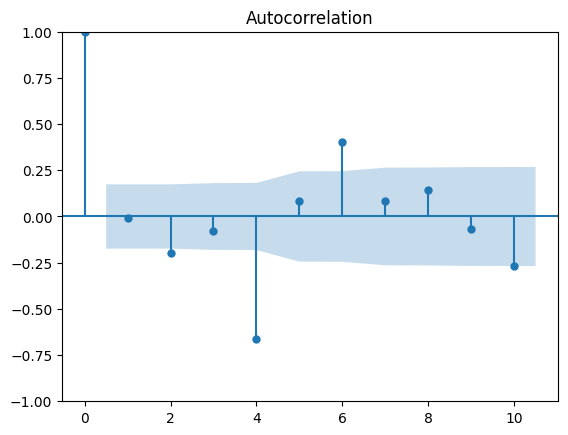

In [ ]:
# Check the stationarity first
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_jpn['Arrivals_clean'], lags=10)
plt.show()

It seems that lag 4 and lag 6 best correlate with residuals of arrival.

### Lag 4

In [ ]:
# For easiness, I'll just use AR (since ACF is well fit for AR)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

In [ ]:
# Fit the data and specify the model for the deseasonalized data
stlf = STLForecast(resid, ARIMA, model_kwargs={"order": (4, 0, 0)})
model = stlf.fit()

# Forecast data
forecasts = model.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [ ]:
# Create date index to anchor the forecast data
forecast_index = pd.date_range('2012-10-01', periods=12, freq = 'QS-OCT')
forecast_index

DatetimeIndex(['2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
               '2013-10-01', '2014-01-01', '2014-04-01', '2014-07-01',
               '2014-10-01', '2015-01-01', '2015-04-01', '2015-07-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [ ]:
# Init forecast data with zero
forecast_data = pd.DataFrame(data = np.zeros((12,4)),
                             columns = data_jpn.columns,
                             index = forecast_index)

In [ ]:
# Concat the data
data_jpn_forecast_1 = pd.concat([data_jpn, forecast_data])
data_jpn_forecast_1

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean
1981-01-01,Japan,14763.0,12717.682819,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125
...,...,...,...,...
2014-07-01,0.0,0.0,0.000000,0.000000
2014-10-01,0.0,0.0,0.000000,0.000000
2015-01-01,0.0,0.0,0.000000,0.000000
2015-04-01,0.0,0.0,0.000000,0.000000


In [ ]:
# Fill up the origin.
# Since the Origin column share the same values, I can recall latest cell value to
# fill the zeros in Origin.
last_date_fr = '2012-10-01'
last_date_or = '2012-07-01'

# 1st param in loc perform as row index
data_jpn_forecast_1.loc[last_date_or:, 'Origin'] = data_jpn.loc[last_date_or, 'Origin']
data_jpn_forecast_1

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean
1981-01-01,Japan,14763.0,12717.682819,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125
...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000
2014-10-01,Japan,0.0,0.000000,0.000000
2015-01-01,Japan,0.0,0.000000,0.000000
2015-04-01,Japan,0.0,0.000000,0.000000


In [ ]:
# Concat the trend and seasonal component
data_jpn_forecast_1['Season'] = np.zeros((139, 1))
data_jpn_forecast_1['Trend']  = np.zeros((139, 1))
data_jpn_forecast_1['Resid']  = np.zeros((139, 1))

data_jpn_forecast_1.loc[data_jpn_forecast_1.index, 'Season'] = seasonal
data_jpn_forecast_1.loc[data_jpn_forecast_1.index, 'Trend']  = trend
data_jpn_forecast_1.loc[data_jpn_forecast_1.index, 'Resid'] = resid

data_jpn_forecast_1.loc[last_date_fr:, 'Resid']

,Resid
2012-10-01,NaN
2013-01-01,NaN
2013-04-01,NaN
2013-07-01,NaN
2013-10-01,NaN
2014-01-01,NaN
2014-04-01,NaN
2014-07-01,NaN
2014-10-01,NaN
2015-01-01,NaN


In [ ]:
# Fill up resid with its forecasted value
data_jpn_forecast_1.loc[last_date_fr:, 'Resid'] = forecasts
data_jpn_forecast_1

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean,Season,Trend,Resid
1981-01-01,Japan,14763.0,12717.682819,-55.555854,2045.317181,12773.238673,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997,-3891.897809,13227.193806,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163,-3521.630485,13676.688322,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938,5162.152232,14124.207830,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125,2711.837391,14570.398733,-165.236125
...,...,...,...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-1478.015565
2014-10-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-217.117645
2015-01-01,Japan,0.0,0.000000,0.000000,NaN,NaN,288.757864
2015-04-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-466.510532


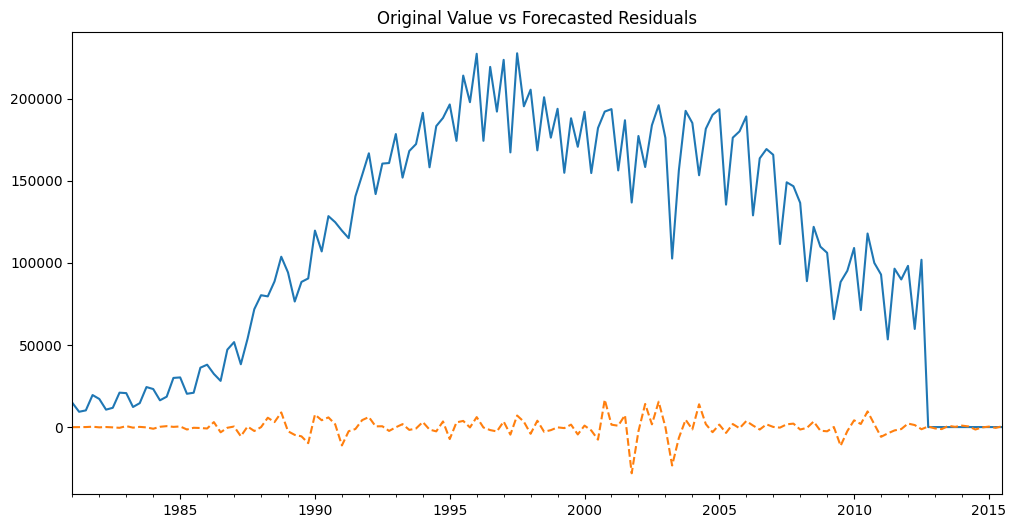

In [ ]:
# Plot the resids
data_jpn_forecast_1['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_1['Resid'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Residuals');

In [ ]:
# Get the quarter and year in forecasted date index
data_jpn_forecast_1.loc[forecast_index,"Quarter"] = data_jpn_forecast_1.loc[forecast_index].index.quarter
data_jpn_forecast_1.loc[forecast_index,"Year"] = data_jpn_forecast_1.loc[forecast_index].index.year

In [ ]:
# Get the quarter and year in original date index
data_jpn_forecast_1.loc[:last_date_fr,"Quarter"] = data_jpn_forecast_1.loc[:last_date_fr].index.quarter
data_jpn_forecast_1.loc[:last_date_fr,"Year"] = data_jpn_forecast_1.loc[:last_date_fr].index.year

In [ ]:
data_jpn_forecast_1

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean,Season,Trend,Resid,Quarter,Year
1981-01-01,Japan,14763.0,12717.682819,-55.555854,2045.317181,12773.238673,-55.555854,1.0,1981.0
1981-04-01,Japan,9321.0,13212.897809,-14.295997,-3891.897809,13227.193806,-14.295997,2.0,1981.0
1981-07-01,Japan,10166.0,13687.630485,10.942163,-3521.630485,13676.688322,10.942163,3.0,1981.0
1981-10-01,Japan,19509.0,14346.847768,222.639938,5162.152232,14124.207830,222.639938,4.0,1981.0
1982-01-01,Japan,17117.0,14405.162609,-165.236125,2711.837391,14570.398733,-165.236125,1.0,1982.0
...,...,...,...,...,...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-1478.015565,3.0,2014.0
2014-10-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-217.117645,4.0,2014.0
2015-01-01,Japan,0.0,0.000000,0.000000,NaN,NaN,288.757864,1.0,2015.0
2015-04-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-466.510532,2.0,2015.0


In [ ]:
# Add the Forecasted Resid with Season: Naive method
# First, we need the latest season/quarter
last_season = data_jpn_forecast_1.iloc[123:127][["Arrivals", "Season", 'Quarter']]
quarter_map = last_season["Season"]
quarter_map

,Season
2011-10-01,5506.126677
2012-01-01,9404.052366
2012-04-01,-29267.015337
2012-07-01,14192.291664


In [ ]:
# To map the latest seasonal value to forecasted date index, we need an anchor
# The anchor is quarter information. Thus, same quarter will be filled with its associated season value
quarter_map = last_season.set_index("Quarter")["Season"]
quarter_map

,Season
Quarter,
4.0,5506.126677
1.0,9404.052366
2.0,-29267.015337
3.0,14192.291664


In [ ]:
# For every quarter in forecasted index, fill with quarter_map (its associated quarter info)
data_jpn_forecast_1.loc[last_date_fr:, "Season"] = [quarter_map[i] for i in data_jpn_forecast_1.loc[last_date_fr:, 'Quarter']]

In [ ]:
# Introduce the seasonal component within residual (naive method)
data_jpn_forecast_1['Season_Resid'] = data_jpn_forecast_1['Season'] + data_jpn_forecast_1['Resid']

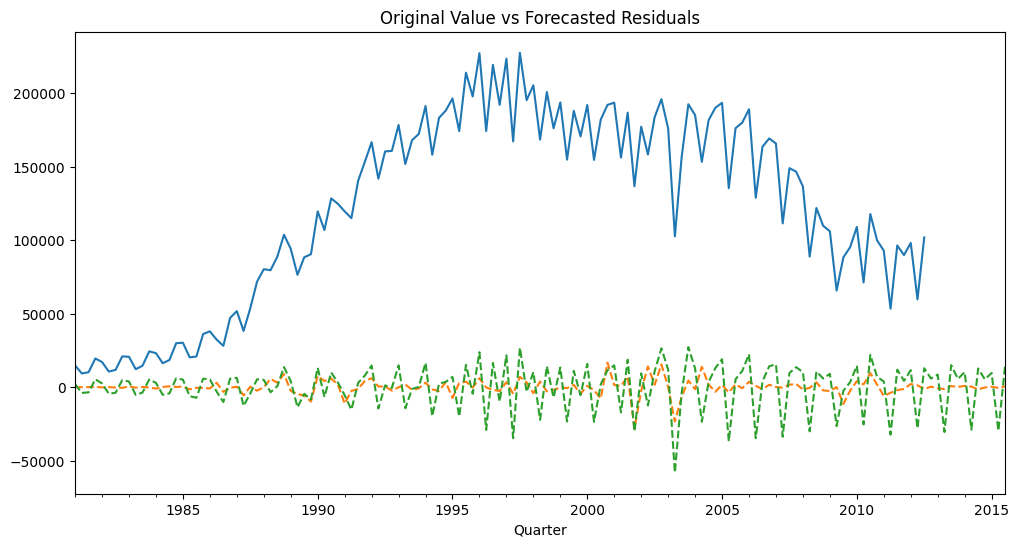

In [ ]:
# Plot
data_jpn['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_1['Resid'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Residuals');
data_jpn_forecast_1['Season_Resid'].plot(figsize=[12, 6], linestyle='--');

In [ ]:
# Introduce trend with the latest year trend
data_jpn_forecast_1.loc[last_date_fr:, 'Trend'] = 89017.162298
data_jpn_forecast_1['Forecasted_Arrivals'] = np.zeros((139,1))
data_jpn_forecast_1.loc[last_date_fr:, 'Forecasted_Arrivals'] = data_jpn_forecast_1['Season_Resid'] + 89017.162298
data_jpn_forecast_1.loc[:last_date_fr, 'Forecasted_Arrivals'] = data_jpn_forecast_1.loc[:last_date_fr, 'Arrivals']

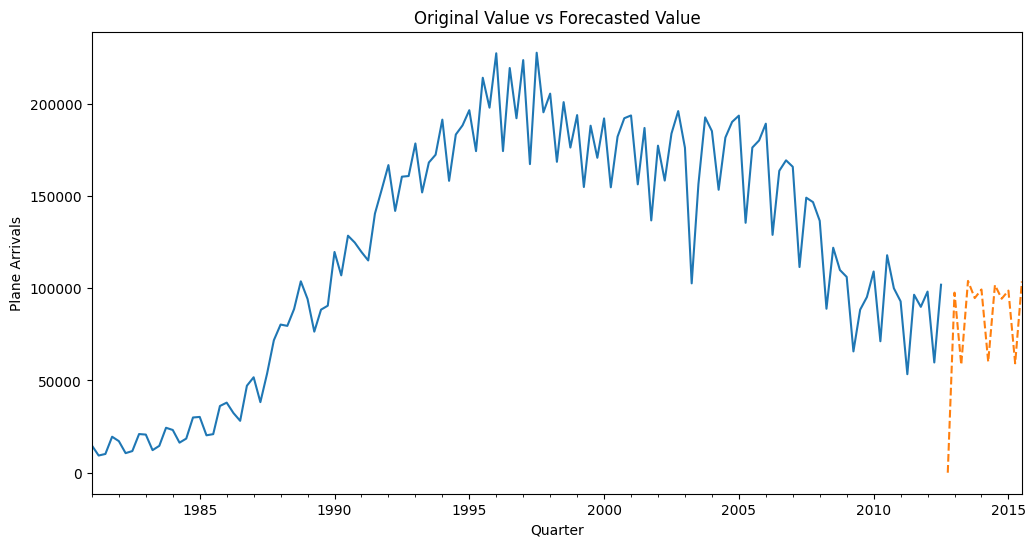

In [ ]:
# Plot
data_jpn['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_1.loc[last_date_fr:, 'Forecasted_Arrivals'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Value')
plt.ylabel('Plane Arrivals');

### Lag 6

In [ ]:
# Fit the data and specify the model for the deseasonalized data
stlf = STLForecast(resid, ARIMA, model_kwargs={"order": (6, 0, 0)})
model = stlf.fit()

# Forecast data
forecasts = model.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [ ]:
# Create date index to anchor the forecast data
forecast_index = pd.date_range('2012-10-01', periods=12, freq = 'QS-OCT')
forecast_index

DatetimeIndex(['2012-10-01', '2013-01-01', '2013-04-01', '2013-07-01',
               '2013-10-01', '2014-01-01', '2014-04-01', '2014-07-01',
               '2014-10-01', '2015-01-01', '2015-04-01', '2015-07-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [ ]:
# Init forecast data with zero
forecast_data = pd.DataFrame(data = np.zeros((12,4)),
                             columns = data_jpn.columns,
                             index = forecast_index)

In [ ]:
# Concat the data
data_jpn_forecast_2 = pd.concat([data_jpn, forecast_data])
data_jpn_forecast_2

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean
1981-01-01,Japan,14763.0,12717.682819,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125
...,...,...,...,...
2014-07-01,0.0,0.0,0.000000,0.000000
2014-10-01,0.0,0.0,0.000000,0.000000
2015-01-01,0.0,0.0,0.000000,0.000000
2015-04-01,0.0,0.0,0.000000,0.000000


In [ ]:
# Fill up the origin.
# Since the Origin column share the same values, I can recall latest cell value to
# fill the zeros in Origin.
last_date_fr = '2012-10-01'
last_date_or = '2012-07-01'

# 1st param in loc perform as row index
data_jpn_forecast_2.loc[last_date_or:, 'Origin'] = data_jpn.loc[last_date_or, 'Origin']
data_jpn_forecast_2

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean
1981-01-01,Japan,14763.0,12717.682819,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125
...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000
2014-10-01,Japan,0.0,0.000000,0.000000
2015-01-01,Japan,0.0,0.000000,0.000000
2015-04-01,Japan,0.0,0.000000,0.000000


In [ ]:
# Concat the trend and seasonal component
data_jpn_forecast_2['Season'] = np.zeros((139, 1))
data_jpn_forecast_2['Trend']  = np.zeros((139, 1))
data_jpn_forecast_2['Resid']  = np.zeros((139, 1))

data_jpn_forecast_2.loc[data_jpn_forecast_2.index, 'Season'] = seasonal
data_jpn_forecast_2.loc[data_jpn_forecast_2.index, 'Trend']  = trend
data_jpn_forecast_2.loc[data_jpn_forecast_2.index, 'Resid'] = resid

data_jpn_forecast_2.loc[last_date_fr:, 'Resid']

,Resid
2012-10-01,NaN
2013-01-01,NaN
2013-04-01,NaN
2013-07-01,NaN
2013-10-01,NaN
2014-01-01,NaN
2014-04-01,NaN
2014-07-01,NaN
2014-10-01,NaN
2015-01-01,NaN


In [ ]:
# Fill up resid with its forecasted value
data_jpn_forecast_2.loc[last_date_fr:, 'Resid'] = forecasts
data_jpn_forecast_2

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean,Season,Trend,Resid
1981-01-01,Japan,14763.0,12717.682819,-55.555854,2045.317181,12773.238673,-55.555854
1981-04-01,Japan,9321.0,13212.897809,-14.295997,-3891.897809,13227.193806,-14.295997
1981-07-01,Japan,10166.0,13687.630485,10.942163,-3521.630485,13676.688322,10.942163
1981-10-01,Japan,19509.0,14346.847768,222.639938,5162.152232,14124.207830,222.639938
1982-01-01,Japan,17117.0,14405.162609,-165.236125,2711.837391,14570.398733,-165.236125
...,...,...,...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-1509.890941
2014-10-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-340.010945
2015-01-01,Japan,0.0,0.000000,0.000000,NaN,NaN,327.459072
2015-04-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-436.304020


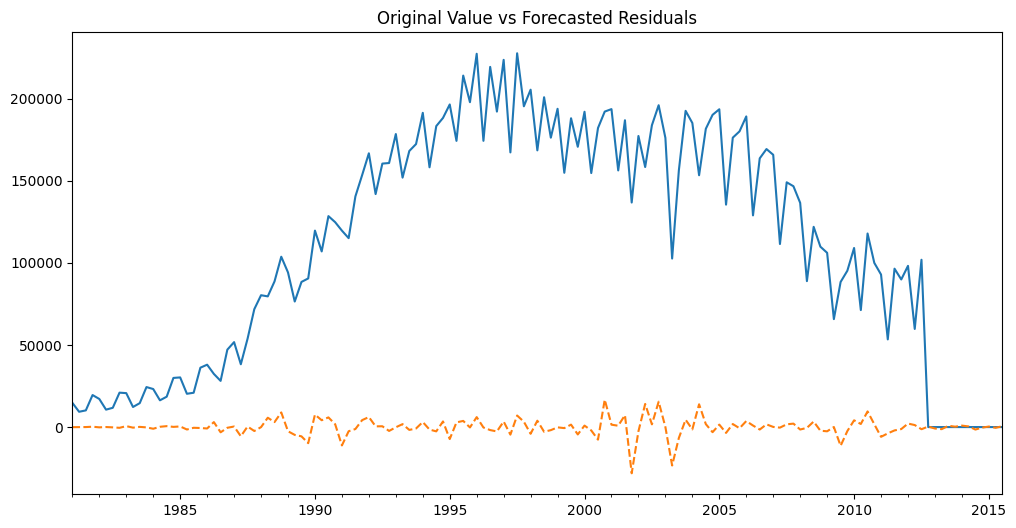

In [ ]:
# Plot the resids
data_jpn_forecast_2['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_2['Resid'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Residuals');

In [ ]:
# Get the quarter and year in forecasted date index
data_jpn_forecast_2.loc[forecast_index,"Quarter"] = data_jpn_forecast_2.loc[forecast_index].index.quarter
data_jpn_forecast_2.loc[forecast_index,"Year"] = data_jpn_forecast_2.loc[forecast_index].index.year

In [ ]:
# Get the quarter and year in original date index
data_jpn_forecast_2.loc[:last_date_fr,"Quarter"] = data_jpn_forecast_2.loc[:last_date_fr].index.quarter
data_jpn_forecast_2.loc[:last_date_fr,"Year"] = data_jpn_forecast_2.loc[:last_date_fr].index.year

In [ ]:
data_jpn_forecast_2

,Origin,Arrivals,Arrivals_nosea,Arrivals_clean,Season,Trend,Resid,Quarter,Year
1981-01-01,Japan,14763.0,12717.682819,-55.555854,2045.317181,12773.238673,-55.555854,1.0,1981.0
1981-04-01,Japan,9321.0,13212.897809,-14.295997,-3891.897809,13227.193806,-14.295997,2.0,1981.0
1981-07-01,Japan,10166.0,13687.630485,10.942163,-3521.630485,13676.688322,10.942163,3.0,1981.0
1981-10-01,Japan,19509.0,14346.847768,222.639938,5162.152232,14124.207830,222.639938,4.0,1981.0
1982-01-01,Japan,17117.0,14405.162609,-165.236125,2711.837391,14570.398733,-165.236125,1.0,1982.0
...,...,...,...,...,...,...,...,...,...
2014-07-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-1509.890941,3.0,2014.0
2014-10-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-340.010945,4.0,2014.0
2015-01-01,Japan,0.0,0.000000,0.000000,NaN,NaN,327.459072,1.0,2015.0
2015-04-01,Japan,0.0,0.000000,0.000000,NaN,NaN,-436.304020,2.0,2015.0


In [ ]:
# Add the Forecasted Resid with Season: Naive method
# First, we need the latest season/quarter
last_season = data_jpn_forecast_2.iloc[123:127][["Arrivals", "Season", 'Quarter']]
quarter_map = last_season["Season"]
quarter_map

,Season
2011-10-01,5506.126677
2012-01-01,9404.052366
2012-04-01,-29267.015337
2012-07-01,14192.291664


In [ ]:
# To map the latest seasonal value to forecasted date index, we need an anchor
# The anchor is quarter information. Thus, same quarter will be filled with its associated season value
quarter_map = last_season.set_index("Quarter")["Season"]
quarter_map

,Season
Quarter,
4.0,5506.126677
1.0,9404.052366
2.0,-29267.015337
3.0,14192.291664


In [ ]:
# For every quarter in forecasted index, fill with quarter_map (its associated quarter info)
data_jpn_forecast_2.loc[last_date_fr:, "Season"] = [quarter_map[i] for i in data_jpn_forecast_2.loc[last_date_fr:, 'Quarter']]

In [ ]:
# Introduce the seasonal component within residual (naive method)
data_jpn_forecast_2['Season_Resid'] = data_jpn_forecast_2['Season'] + data_jpn_forecast_2['Resid']

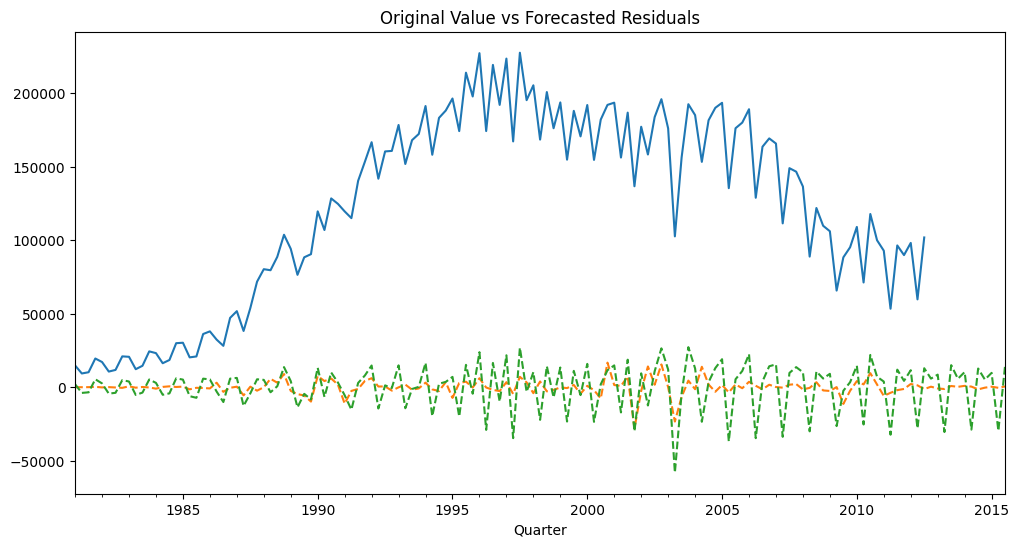

In [ ]:
# Plot
data_jpn['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_2['Resid'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Residuals');
data_jpn_forecast_2['Season_Resid'].plot(figsize=[12, 6], linestyle='--');

In [ ]:
# Introduce trend with the latest year trend
data_jpn_forecast_2.loc[last_date_fr:, 'Trend'] = 89017.162298
data_jpn_forecast_2['Forecasted_Arrivals'] = np.zeros((139,1))
data_jpn_forecast_2.loc[last_date_fr:, 'Forecasted_Arrivals'] = data_jpn_forecast_2['Season_Resid'] + 89017.162298
data_jpn_forecast_2.loc[:last_date_fr, 'Forecasted_Arrivals'] = data_jpn_forecast_2.loc[:last_date_fr, 'Arrivals']

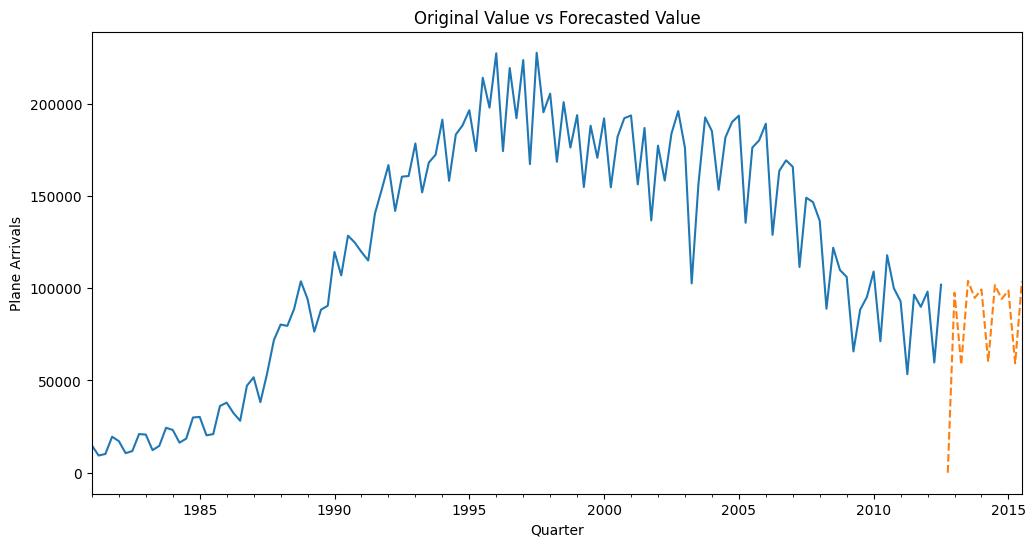

In [ ]:
# Plot
data_jpn['Arrivals'].plot(figsize=[12, 6])
data_jpn_forecast_2.loc[last_date_fr:, 'Forecasted_Arrivals'].plot(figsize=[12, 6], linestyle='--')
plt.title('Original Value vs Forecasted Value')
plt.ylabel('Plane Arrivals');

### Closing

In [ ]:
# Check the forecast residual average from both lags
# Lag 4
data_jpn_forecast_1['Resid'].describe()

,Resid
count,139.000000
mean,-12.764462
std,5255.868233
min,-28136.927758
25%,-1619.486217
50%,-14.295997
75%,1719.055898
max,16698.270087


In [ ]:
# Lag 6
data_jpn_forecast_2['Resid'].describe()

,Resid
count,139.000000
mean,-13.259922
std,5256.153618
min,-28136.927758
25%,-1619.486217
50%,-14.295997
75%,1719.055898
max,16698.270087


In [ ]:
# Lag 4
data_jpn_forecast_1['Forecasted_Arrivals'].describe()

,Forecasted_Arrivals
count,139.000000
mean,118533.130036
std,63061.702325
min,0.000000
25%,71530.000000
50%,119638.000000
75%,175228.500000
max,227641.000000


In [ ]:
data_jpn_forecast_2['Forecasted_Arrivals'].describe()

,Forecasted_Arrivals
count,139.000000
mean,118532.992094
std,63061.740228
min,0.000000
25%,71530.000000
50%,119638.000000
75%,175228.500000
max,227641.000000


Though the forecasted data is typical, we can see a slight differences between forecasted arrivals on lag-4 and lag-6. Lag-4 provides slightly less deviation. Which is better?
1. We can evaluate which is better, with RMSE/MSE/MAPE, since no train-test mechanism
2. Also no pre-diagnose with Bayesian Information Criterion

Further about this will be done in Time Series Analytics 3